# **ML-6. Отбор и селекция признаков**

# 1. Введение

✍ Теперь, когда вы знаете основные классы задач машинного обучения, настало время перейти к **предварительной обработке (препроцессингу, preprocessing) данных**. Препроцессинг в машинном обучении — это важный шаг, который помогает повысить качество данных с целью извлечения из них значимых идей.

Как правило, реальные данные являются неполными, непоследовательными, неточными (содержат ошибки или выбросы). Препроцессинг данных помогает очищать, форматировать и упорядочивать необработанные данные, тем самым делая их готовыми к работе с моделями машинного обучения.

**В этом модуле мы повторим:**

* какие способы представления данных существуют;
* почему к разным представлениям данных нужны разные подходы;
* как происходит кодирование признаков;
* какие способы заполнения пропусков в данных существуют.

**МЫ РАЗБЕРЁМ:**

* что такое разбиение по бинам и как его осуществить;

* что такое трансформация распределения и какие её разновидности существуют;

* что такое масштабирование признаков;

* как работать с датами и расстояниями;

* какие алгоритмы машинного обучения более чувствительны к предобработке данных.

**ВЫ НАУЧИТЕСЬ:**

* выбирать подходящий метод кодирования признаков в зависимости  от типа модели машинного обучения;

* подготавливать данные к обучению;

* производить анализ влияния отбора и селекции признаков на качество модели с помощью Comet ML.



# 2. Способы представления данных

В основном в таблицах встречается три типа данных: object, int64 и float64.

**При этом выделяют:**

* текстовые признаки (object);
* числовые признаки (int64 и float64);
* признаки, обозначающие дату и время/широту и долготу (представляются в числовом формате);
* категориальные признаки, которые могут иметь любой из трёх типов данных и обозначают принадлежность объекта к какому-то классу/категории ([см. Python 11.5. «Тип данных Category»](https://lms.skillfactory.ru/courses/course-v1:SkillFactory+DST-3.0+28FEB2021/jump_to_id/544f4978492e412d93260e3f067e7494));
* бинарные признаки, которые являются подвидом категориальных признаков и обозначают принадлежность к одному из двух классов/категорий.

**? Вопрос на размышление**

Могут ли категориальные признаки быть текстовыми?

**Ответ**

Да, категориальные признаки могут быть представлены как в формате текста, так и числовом формате. При этом текстовые признаки не всегда должны быть категориальными (например, в качестве признака могут использоваться имена пользователей).

Для наглядности давайте рассмотрим пример [данных](https://lms.skillfactory.ru/assets/courseware/v1/ce2e1bb8bb176f213d62f74e9844c7a1/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/data_ford_price.zip) для задачи предсказания цены автомобиля. В выборке представлено 7017 наблюдений и 12 характеристик для каждого из объектов.

![](https://lms.skillfactory.ru/assets/courseware/v1/c6ebd8733e171a77dab0dcf8988b3e31/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml6-2_4.png)

In [2]:
import pandas as pd

data = pd.read_excel('data/data_ford_price.xlsx', engine='openpyxl')
data.head()

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         7017 non-null   int64  
 1   year          7017 non-null   int64  
 2   condition     7017 non-null   int64  
 3   cylinders     7017 non-null   int64  
 4   odometer      7017 non-null   int64  
 5   title_status  7017 non-null   object 
 6   transmission  7017 non-null   object 
 7   drive         6626 non-null   object 
 8   size          5453 non-null   object 
 9   lat           7017 non-null   float64
 10  long          7017 non-null   float64
 11  weather       6837 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 658.0+ KB


Для более подробного анализа числовых признаков используют методы ```describe()``` и ```hist()```. Для оценки распределения текстовых признаков можно воспользоваться методом ```value_counts()```.

Как вы поняли, разные представления данных требуют разного формата препроцессинга. Машины способны обрабатывать только цифровую информацию, в связи с чем все текстовые признаки должны быть переведены в числовой формат. Более того, к текстовым признакам могут быть применены **регулярные выражения** для агрегации важной информации и создания новых признаков ([см. EDA-3.2. «Создание признаков»](https://lms.skillfactory.ru/courses/course-v1:SkillFactory+DST-3.0+28FEB2021/jump_to_id/50a5911d6e7f43d2ac47907d02631c4e)).

Текстовые признаки, как и числовые, нуждаются в заполнении пропусков для последующей корректной работы алгоритмов машинного обучения. Однако способы такой обработки различны для двух данных типов. Числовые категориальные признаки также нуждаются в предобработке.

✍ В следующих юнитах мы подробно, на примерах, рассмотрим задачи кодирования категориальных признаков и обработки пропусков.

# 3. Кодирование признаков

✍ Как вы уже знаете, большинство моделей машинного обучения не умеют работать с текстовыми признаками.

[→ Скачайте ноутбук с кодом юнита](https://lms.skillfactory.ru/assets/courseware/v1/65506967131689b6f58382c67ead227f/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/%D0%9A%D0%BE%D0%B4%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D0%B2.ipynb)

Обратимся к нашим данным. Нас просят предсказать цену автомобиля. Для обучения модели выделим целевой столбец:

In [4]:
y = data['price']
x = data.drop(columns='price')

Попробуем применить линейную регрессию на «сырых» данных:



In [5]:
from sklearn import linear_model #линейные модели


```py

lr = linear_model.LinearRegression()
lr.fit(x,y)

Output exceeds the size limit. Open the full output data in a text editor
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
e:\Study\Data science SF\IDE\SkillFactory\ML-6. Отбор и селекция признаков\ML-6. Отбор и селекция признаков.ipynb Ячейка 15 in <module>
      1 from sklearn import linear_model #линейные модели
      3 lr = linear_model.LinearRegression()
----> 4 lr.fit(x,y)

File c:\Users\Home\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:684, in LinearRegression.fit(self, X, y, sample_weight)
    680 n_jobs_ = self.n_jobs
    682 accept_sparse = False if self.positive else ["csr", "csc", "coo"]
--> 684 X, y = self._validate_data(
    685     X, y, accept_sparse=accept_sparse, y_numeric=True, multi_output=True
    686 )
    688 sample_weight = _check_sample_weight(
    689     sample_weight, X, dtype=X.dtype, only_non_negative=True
    690 )
    692 X, y, X_offset, y_offset, X_scale = _preprocess_data(
    693     X,
    694     y,
   (...)
    698     sample_weight=sample_weight,
    699 )

File c:\Users\Home\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:596, in BaseEstimator._validate_data(self, X, y, reset, validate_separately, **check_params)
    594         y = check_array(y, input_name="y", **check_y_params)
...
File c:\Users\Home\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\generic.py:2064, in NDFrame.__array__(self, dtype)
   2063 def __array__(self, dtype: npt.DTypeLike | None = None) -> np.ndarray:
-> 2064     return np.asarray(self._values, dtype=dtype)

ValueError: could not convert string to float: 'clean'

```

Чтобы этой ошибки не возникало, необходимо закодировать данные.

В разделе [EDA-3](https://lms.skillfactory.ru/courses/course-v1:SkillFactory+DST-3.0+28FEB2021/jump_to_id/9654ef399a924f259b9f0631ead8ea2b) вы познакомились с такими методами кодирования, как:

* **порядковое кодирование**;  
    В порядковой кодировке признаков каждому строковому значению присваивается значение в виде целого числа, свойственного конкретному значению строки. Число столбцов в выборке остаётся неизменным.

* **двоичное кодирование**;  
    При двоичном кодировании, значения признака переводятся в некоторый числовой порядок, затем полученные целые числа кодируются в двоичный код. Цифры двоичного представления формируют новые столбцы. Выборка увеличивается.

* **однократное кодирование**.  
    Однократное кодирование для каждой новой категории создаёт новый бинарный признак. Таким образом, число столбцов возрастает на число уникальных значений кодируемого признака.

![](https://lms.skillfactory.ru/assets/courseware/v1/8be15badcefe262082f2ba923930636a/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml6-3_2.png)

В таблице ниже представлено сравнение данных способов кодировки:


ЗНАЧЕНИЯ ПРИЗНАКА «ОБРАЗОВАНИЕ»|ПОРЯДКОВОЕ КОДИРОВАНИЕ|ДВОИЧНОЕ КОДИРОВАНИЕ|ОДНОКРАТНОЕ КОДИРОВАНИЕ
-|-|-|-
**Нет**|1|000|000001
**Начальное**|2|001|000010
**Среднее**|3|010|000100
**BSc**|4|011|001000
**MSc**|5|100|010000
**PhD**|6|101|100000

Для реализации данных методов мы использовали библиотеку [category_encoders](https://contrib.scikit-learn.org/category_encoders/). Однако вы уже знаете и такой мощный инструмент, как [scikit-learn](https://scikit-learn.org/). Данная библиотека содержит набор реализованных алгоритмов машинного обучения, метрик для оценки их качества, а также  класс preprocessing для предобработки данных, в частности — для кодирования категориальных признаков.

Представленная ниже таблица показывает соответствие типа кодирования классу в sklearn.processing

![](https://lms.skillfactory.ru/assets/courseware/v1/1896b56292492adb558d8d7998c158ad/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml6-3_3.png)

ТИП КОДИРОВКИ|КЛАСС БИБЛИОТЕКИ SKLEARN
-|-
**Порядковое кодирование**|LabelEncoder
**Двоичное кодирование**|LabelBinarizer
**Однократное кодирование**|OneHotEncoder

Преимущество использования одной библиотеки состоит в типичности методов. Например, вы знаете, что для обучения модели в sklearn используется метод fit(). При кодировании признаков здесь также применяют fit() для подгонки кодировщика под выборку и transform() — для преобразования данных в числа.

![](https://lms.skillfactory.ru/assets/courseware/v1/d722e5d9f97aea89b2bf101e6ada29c6/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml6-3_4.png)

Из предыдущих модулей мы знаем, что при решении задач машинного обучения данные разбираются на обучающую (train) и валидационную (validation) выборки (последняя также может быть тестовой (test) выборкой). По аналогии подгонка кодировщика происходит на обучающей выборке, а трансформация — на обучающей и на тестовой.

Почему так? Потому что наша обученная модель не должна видеть данные, которые подаются в неё на тесте. Только так мы можем судить о том, что модель обучена качественно. То же самое и с кодировкой.

Давайте посмотрим на кодирование признака Образование двоичным способом:

In [6]:
from sklearn.preprocessing  import LabelBinarizer
 
lb = LabelBinarizer()
 
education = ['нет', 'начальное', 'среднее', 'BSc', 'MSc', 'начальное', 'PhD']
 
lb.fit(education)
 
print('категории:', lb.classes_)
 
lb.transform(['нет', 'MSc'])

категории: ['BSc' 'MSc' 'PhD' 'начальное' 'нет' 'среднее']


array([[0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0]])

У класса LabelBinarizer, как и у двух остальных, есть атрибут classes_, который выводит список уникальных значений признака.

Вернёмся к нашей выборке. В ней присутствуют следующие категориальные признаки: condition, cylinders, title_status, transmission, drive, size.

При этом признаки condition и cylinders — числовые, а title_status, transmission, drive, size — текстовые.

![](https://lms.skillfactory.ru/assets/courseware/v1/2e80fe726871bdcb77be326c16c81be5/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml6-3_6.png)

Важно производить кодирование номинальных признаков, даже если они уже представлены в числовом формате, так как, в отличие от порядковых признаков, **категории номинальных являются независимыми**. В случае порядкового кодирования таких признаков мы вносим искусственные закономерности в данные (например, чем больше числовой код цилиндров, тем лучше, хотя это необязательно так).

Посмотрим на число уникальных значений номинальных признаков title_status, transmission, drive, size и cylinders:

In [7]:
columns_to_change = ['cylinders', 'title_status', 'transmission', 'drive', 'size']
 
for column in columns_to_change:
 print('Число уникальных значений признака {}: '.format(column), data[column].nunique())

Число уникальных значений признака cylinders:  6
Число уникальных значений признака title_status:  5
Число уникальных значений признака transmission:  3
Число уникальных значений признака drive:  3
Число уникальных значений признака size:  4


Итак, нам подходит однократное кодирование. Применим его к выбранным столбцам. Так как у нас нет отдельной тестовой выборки, то мы используем только один метод — fit_transform(). В качестве аргумента передаём таблицу с выбранными для преобразования признаками.

С помощью метода get_feature_names() получим список новых названий колонок:

In [8]:
from sklearn.preprocessing import OneHotEncoder
 
one_hot_encoder = OneHotEncoder()
 
# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
data_onehot = one_hot_encoder.fit_transform(data[columns_to_change]).toarray()
 
# запишем полученные названия новых колонок в отдельную переменную
column_names = one_hot_encoder.get_feature_names(columns_to_change)
print(column_names)

['cylinders_3' 'cylinders_4' 'cylinders_5' 'cylinders_6' 'cylinders_8'
 'cylinders_10' 'title_status_clean' 'title_status_lien'
 'title_status_missing' 'title_status_rebuilt' 'title_status_salvage'
 'transmission_automatic' 'transmission_manual' 'transmission_other'
 'drive_4wd' 'drive_fwd' 'drive_rwd' 'drive_nan' 'size_compact'
 'size_full-size' 'size_mid-size' 'size_sub-compact' 'size_nan']


c:\Users\Home\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Отлично, категориальные признаки закодированы. Теперь нам необходимо соединить преобразованные данные с исходными.

Напомним, что у библиотеки pandas есть дефолтный метод get_dummies() для получения однократного кодирования признаков. Однако OneHotEncoder способен принимать на вход как таблицы, так и numpy-массивы.

### Задание 3.7

Какая форма (количество строк и столбцов) будет у нашего датасета о стоимости автомобилей после кодировки номинальных признаков однократным методом?

Для ответа на поставленный вопрос выполните следующие шаги:

1. Загрузите данные в локальную директорию с помощью команды 
    ```!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx```
2. Загрузите данные в память ноутбука с помощью функции read_excel() библиотеки pandas.
3. Закодируйте столбцы из списка columns_to_change.
4. Преобразуйте полученный массив закодированных данных в формат DataFrame, явно указав имена колонок.  
    Подсказка 1  
    Подсказка 2  
5. Соедините новую таблицу с исходной.  
    Подсказка 1  
    Подсказка 2  
    Подсказка 3  
6. Удалите закодированные столбцы columns_to_change из полученной таблицы.  
    Подсказка 1  
    Подсказка 2  
7. Выведите на экран форму полученной таблицы.  
    Подсказка 1

In [9]:
data_encoded = one_hot_encoder.fit_transform(data[columns_to_change]).toarray()

In [10]:
data_encoded = pd.DataFrame(
    data_encoded,
    index=data.index,
    columns=column_names
)

In [11]:
data_joined = data.join(
    data_encoded,
    how='left'
)

In [12]:
data_droped = data_joined.drop(columns=columns_to_change)

In [13]:
data_droped.head()

,price,year,condition,odometer,lat,long,weather,cylinders_3,cylinders_4,cylinders_5,...,transmission_other,drive_4wd,drive_fwd,drive_rwd,drive_nan,size_compact,size_full-size,size_mid-size,size_sub-compact,size_nan
0,43900,2016,4,43500,36.471500,-82.483400,59.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,15490,2009,2,98131,40.468826,-74.281734,52.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2495,2002,2,201803,42.477134,-82.949564,45.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1300,2000,1,170305,40.764373,-82.349503,49.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,13865,2010,3,166062,49.210949,-123.114720,NaN,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
data_droped.shape

(7017, 30)

# 4. Обработка пропусков и выбросов

## РАБОТА С ПРОПУСКАМИ

In [15]:
data = pd.read_excel('data/data_ford_price.xlsx', engine='openpyxl') 


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         7017 non-null   int64  
 1   year          7017 non-null   int64  
 2   condition     7017 non-null   int64  
 3   cylinders     7017 non-null   int64  
 4   odometer      7017 non-null   int64  
 5   title_status  7017 non-null   object 
 6   transmission  7017 non-null   object 
 7   drive         6626 non-null   object 
 8   size          5453 non-null   object 
 9   lat           7017 non-null   float64
 10  long          7017 non-null   float64
 11  weather       6837 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 658.0+ KB


Для того чтобы выделить конкретные строки датасета, в столбцах которых присутствуют NaN (пропуски), используются уже знакомые вам методы isnull() ([см. PYTHON-14.3. «Работа с пропусками: как их обнаружить?»](https://lms.skillfactory.ru/courses/course-v1:SkillFactory+DST-3.0+28FEB2021/jump_to_id/478fd2893bc7455bb7c9938ba67bd2b5)) и isna().

Метод isnull() является **алиасом** метода isna(): когда вы используете isnull(), он вызывает isna(). Таким образом, это два одинаковых метода.

**Зачем им нужны разные названия?**

Дело в том, что Pandas DataFrame основан на таблицах языка программирования R. В R значения na и нулевые значения относятся к разным типам. Следовательно, есть два разных метода проверки: na и null. Вот почему в Pandas есть два имени для одного метода.

С другой стороны, в Python библиотека Pandas построена поверх NumPy, у которой нет значений na или null. NumPy использует значения np.NaN для обозначения отсутствующих данных. Даже значения None считаются np.NaN.

Посмотрим, что будет, если просто убрать все строки с пропусками в столбце weather:

In [17]:
data[~data['weather'].isna()]


,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
5,6995,2003,3,8,167662,clean,automatic,4wd,full-size,45.518031,-122.578752,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7012,22500,2015,3,6,23500,clean,automatic,rwd,full-size,32.680700,-117.169800,59.0
7013,5975,2005,2,8,0,clean,automatic,rwd,full-size,38.213303,-85.785762,50.0
7014,9999,2006,3,8,161514,clean,automatic,NaN,full-size,37.609783,-120.995406,59.0
7015,10900,2011,2,8,164000,clean,automatic,4wd,full-size,43.140600,-93.385000,47.0


Число строк сократилось до 6837.

Символ ```~``` (тильда) означает, что мы выбираем все строки датасета ```data```, где не выполняется условие ```data['weather'].isna()```, то есть где нет пропусков в столбце 'weather'.

### Задание 4.2

Какая доля строк в датасете останется, если убрать пропуски в столбце size? Ответ округлите до двух знаков после точки-разделителя.

In [18]:
round(data[~data['size'].isna()].shape[0] / data.shape[0], 2)

0.78

Наибольшая сложность в очистке данных от пропусков заключается в выборе метода их обработки (см. PYTHON-14.4. «Работа с пропусками: методы обработки») . Давайте вспомним, какими они бывают:

![](https://lms.skillfactory.ru/assets/courseware/v1/2fdacf4a1011fa5185fcfac03f053983/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml6-4_2.png)

→ Первым делом воспользуемся методом удаления строк с пропусками. Плюс данного метода состоит в том, что модель, обученная с удалением всех пропущенных значений, является надёжной, то есть имеет сравнительно хорошее качество на тесте. Среди минусов — потеря большого количества информации, а также плохое качество работы, если процент отсутствующих значений слишком велик по сравнению с полным набором данных.

В качестве регрессора воспользуемся линейной моделью, а качество оценим с помощью коэффициента детерминации. Также нам потребуется разделить модель на обучающую и тестовую выборки.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

Удалим данные с пропусками:

In [20]:
y = data['price']
x = data.drop(columns='price')


In [21]:
x = x.dropna()

Мы удалили некоторые строки из таблицы x. Соответственно, надо сделать то же самое в целевой переменной y.

Выберем все оставшиеся индексы таблицы x с помощью метода index(), а затем используем .iloc[], чтобы получить подгруппу целевых значений, соответствующую полученным индексам.

In [22]:
y = y.iloc[x.index]

### Задание 4.3

Проверьте, что переменные x и y имеют одинаковую длину. Заполните пропуски:

In [23]:
x.shape[0] == y.shape[0]

True

Разделим выборку на тренировочную и тестовую в соотношении 80/20:



In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

Следующий блок кода будет повторяться для каждого из методов обработки пропусков.

Проведём кодирование OneHot-методом категориальных переменных.

In [25]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()

Обучаем энкодер и сразу применяем преобразование к выборке. Результат переводим в массив:

In [26]:
X_train_onehot = one_hot_encoder.fit_transform(
    X_train[columns_to_change]).toarray()

Затем применяем полученное преобразование к тестовой выборке. Результат переводим в массив:

In [27]:
X_test_onehot = one_hot_encoder.transform(
    X_test[columns_to_change]).toarray()


Для удобства сохраним полученные названия новых колонок в отдельную переменную:



In [28]:
columns = one_hot_encoder.get_feature_names(columns_to_change)
columns[:10]

c:\Users\Home\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['cylinders_3', 'cylinders_4', 'cylinders_5', 'cylinders_6',
       'cylinders_8', 'cylinders_10', 'title_status_clean',
       'title_status_lien', 'title_status_missing',
       'title_status_rebuilt'], dtype=object)

Теперь у нас есть массив закодированных признаков и наша изначальная таблица. Чтобы соединить эти данные, переведём массив в формат DataFrame.

In [29]:
X_train_onehot_df = pd.DataFrame(X_train_onehot, columns=columns)
X_test_onehot_df = pd.DataFrame(X_test_onehot, columns=columns)

Таблица X_train содержит рандомные индексы, так как мы разделили выборку на train и test. Если просто соединить X_train и X_train_onehot_df, то получится таблица, полная пропусков по причине несовпадения индексов.

Переустановим индексацию в таблицах, применив подряд сразу два метода: reset_index() — для изменения индексов с рандомных на последовательные от 0 до n и drop(['index'], axis = 1) — для удаления образовавшегося столбца 'index'.

In [30]:
X_train = X_train.reset_index().drop(['index'], axis = 1)
X_test = X_test.reset_index().drop(['index'], axis = 1)
 
y_train = y_train.reset_index().drop(['index'], axis = 1)
y_test = y_test.reset_index().drop(['index'], axis = 1)

Объединяем таблицы и удаляем старые категориальные признаки:



In [31]:
X_train_new = pd.concat([X_train, X_train_onehot_df], axis=1)
X_test_new = pd.concat([X_test, X_test_onehot_df], axis=1)
 
X_train_new = X_train_new.drop(columns=columns_to_change)
X_test_new = X_test_new.drop(columns=columns_to_change)

Настало время обучить модель. Для этого создаём объект класса LinearRegression.



In [32]:
lr_model = LinearRegression()


Обучаем модель по МНК:

In [33]:
lr_model.fit(X_train_new, y_train)

LinearRegression()

Делаем предсказание для тренировочной выборки:



In [34]:
y_train_predict = lr_model.predict(X_train_new)

Делаем предсказание для тестовой выборки:



In [35]:
y_test_predict = lr_model.predict(X_test_new)
print("Train R^2: {:.3f}".format(r2_score(y_train, y_train_predict)))
print("Test R^2: {:.3f}".format(r2_score(y_test, y_test_predict)))

# Train R^2: 0.647
# Test R^2: 0.693

Train R^2: 0.647
Test R^2: 0.693


→ Теперь давайте попробуем заполнить пропуски константными значениями и обучить модель заново. Плюс такого подхода состоит в том, что мы предотвращаем потерю данных, которая происходит при удалении строк или столбцов. Основной минус — в снижении разброса (разнообразия) признаков.

Заполним числовой столбец средним значением, округлив его до целого числа:



In [36]:
y = data['price']
x = data.drop(columns='price')

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [38]:
import numpy as np
 
X_train['weather'] = X_train['weather'].fillna(np.round(np.mean(X_train['weather']),0))
X_test['weather'] = X_test['weather'].fillna(np.round(np.mean(X_train['weather']),0))

Для простоты воспользуемся заполнением наиболее частым значением категориальных признаков. Для этого сначала определим их в наших признаках, использовав комбинацию методов value_counts() и head():

In [39]:
X_train['drive'].value_counts(True).head(1)

# 4wd   0.755447
# Name: drive, dtype: float64

4wd    0.738406
Name: drive, dtype: float64

In [40]:
X_train['size'].value_counts(True).head(1)

# full-size   0.877418
# Name: size, dtype: float64

full-size    0.841164
Name: size, dtype: float64

In [41]:
X_train['size'] = X_train['size'].fillna('full-size')
X_train['drive'] = X_train['drive'].fillna('4wd')
 
X_test['size'] = X_test['size'].fillna('full-size')
X_test['drive'] = X_test['drive'].fillna('4wd')

In [42]:
def encode_cat_features(columns_to_change, X_train, X_test, y_train):
  one_hot_encoder = OneHotEncoder()
  X_train_onehot = one_hot_encoder.fit_transform(X_train[columns_to_change]).toarray()
  X_test_onehot = one_hot_encoder.transform(X_test[columns_to_change]).toarray()

  columns = one_hot_encoder.get_feature_names(columns_to_change)
  
  X_train_onehot_df = pd.DataFrame(X_train_onehot, columns=columns)
  X_test_onehot_df = pd.DataFrame(X_test_onehot, columns=columns)

  X_train = X_train.reset_index().drop(['index'], axis = 1)
  X_test = X_test.reset_index().drop(['index'], axis = 1)
  y_train = y_train.reset_index().drop(['index'], axis = 1)

  X_train_new = pd.concat([X_train, X_train_onehot_df], axis=1)
  X_test_new = pd.concat([X_test, X_test_onehot_df], axis=1)
  
  X_train_new = X_train_new.drop(columns=columns_to_change)
  X_test_new = X_test_new.drop(columns=columns_to_change)

  return X_train_new, X_test_new

In [43]:
X_train_new, X_test_new = encode_cat_features(columns_to_change, X_train, X_test, y_train)

c:\Users\Home\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


После обучения модели получился следующий результат:



In [44]:
lr_model = LinearRegression()
lr_model.fit(X_train_new, y_train)
y_train_predict = lr_model.predict(X_train_new)
y_test_predict = lr_model.predict(X_test_new)
print("Train R^2: {:.3f}".format(r2_score(y_train, y_train_predict)))
print("Test R^2: {:.3f}".format(r2_score(y_test, y_test_predict)))

# Train R^2: 0.649
# Test R^2: 0.465

Train R^2: 0.649
Test R^2: 0.465


Напомним: модели с коэффициентом детерминации выше 0.8 можно признать достаточно хорошими. Равенство коэффициента детерминации 1 означает, что объясняемая переменная в точности описывается рассматриваемой моделью.

Приведённые методы обработки отсутствующих значений не учитывают корреляционную связь признака, содержащего пропуски, с остальными. Признаки, не имеющие NaN, можно использовать для прогнозирования пропущенных значений. Строится модель регрессии или классификации в зависимости от характера (категорийного или непрерывного) признака, имеющего пропущенное значение.

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
 
data = x.copy()
 
test_data = data[data['weather'].isnull()]
data.dropna(inplace=True)
 
y_train = data['weather']
X_train = data.drop(['size','weather','drive'], axis=1)
X_test = test_data.drop(['size','weather','drive'], axis=1)
 
one_hot_encoder = OneHotEncoder()
categorial_cols = ['cylinders', 'title_status', 'transmission']
 
X_train_onehot = one_hot_encoder.fit_transform(X_train[categorial_cols]).toarray()
X_test_onehot = one_hot_encoder.transform(X_test[categorial_cols]).toarray()
 
columns = one_hot_encoder.get_feature_names(categorial_cols)
X_train_onehot_df = pd.DataFrame(X_train_onehot, columns=columns)
X_test_onehot_df = pd.DataFrame(X_test_onehot, columns=columns)
 
X_train = X_train.reset_index().drop(['index'], axis = 1)
X_test = X_test.reset_index().drop(['index'], axis = 1)
y_train = y_train.reset_index().drop(['index'], axis = 1)
 
X_train_new = pd.concat([X_train, X_train_onehot_df], axis=1)
X_test_new = pd.concat([X_test, X_test_onehot_df], axis=1)
 
X_train_new = X_train_new.drop(columns=categorial_cols)
X_test_new = X_test_new.drop(columns=categorial_cols)
 
 
model = LinearRegression()
model.fit(X_train_new, y_train)
 
y_pred = model.predict(X_test_new)

c:\Users\Home\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Полученные предсказания есть не что иное, как замена пропусков в столбце weather:

In [46]:
y_pred[:10]

array([[40.91435555],
       [40.7637233 ],
       [39.74866152],
       [41.2755305 ],
       [40.31791932],
       [41.10796547],
       [41.15337846],
       [39.94866488],
       [41.10796547],
       [40.7217165 ]])

### Задание 4.5 (на самопроверку)

Вставьте найденную замену на место пропусков в столбце weather. Используйте тот же метод для заполнения пропусков в size. Обратите внимание на то, какой тип модели нужен (классификация или регрессия) в зависимости от типа признака.

Попробуйте выполнить задание самостоятельно. При затруднениях вы можете посмотреть решение в ноутбуке в начале юнита.

In [47]:
# Заменим пропущенные значения на предсказанные
for i, index in enumerate(test_data.index):
    x['weather'].iloc[index] = y_pred[i]

c:\Users\Home\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [48]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          7017 non-null   int64  
 1   condition     7017 non-null   int64  
 2   cylinders     7017 non-null   int64  
 3   odometer      7017 non-null   int64  
 4   title_status  7017 non-null   object 
 5   transmission  7017 non-null   object 
 6   drive         6626 non-null   object 
 7   size          5453 non-null   object 
 8   lat           7017 non-null   float64
 9   long          7017 non-null   float64
 10  weather       7017 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 603.1+ KB


In [49]:
data = x.copy()

In [50]:
test_data = data[data['size'].isnull()]
data.dropna(inplace=True)

In [51]:
y_train = data['size']
X_train = data.drop(['size', 'drive'], axis=1)
X_test = test_data.drop(['size', 'drive'], axis=1)

In [52]:
X_train_new, X_test_new = encode_cat_features(categorial_cols, X_train, X_test, y_train)

c:\Users\Home\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [53]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_new, y_train)
 
y_pred = model.predict(X_test_new)
y_pred

c:\Users\Home\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['full-size', 'full-size', 'full-size', ..., 'full-size',
       'full-size', 'full-size'], dtype=object)

In [54]:
# Заменим пропущенные значения на предсказанные
for i, index in enumerate(test_data.index):
    x['size'].iloc[index] = y_pred[i]

c:\Users\Home\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [55]:
x.head()

,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.000000
1,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.000000
2,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.000000
3,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.000000
4,2010,3,8,166062,clean,automatic,4wd,full-size,49.210949,-123.114720,40.914356


## РАБОТА С ВЫБРОСАМИ

Помимо пропусков, на пути анализа данных всплывает ещё один подводный камень — выбросы (аномалии).

Вспомним, какие методы детектирования выбросов существуют.

Выбросы могут искажать статистические показатели и распределения данных. Удаление выбросов из обучающих данных перед моделированием может привести к росту качества прогнозов.

К счастью, существуют автоматические, основанные на моделях методы выявления выбросов, которые уже имплементированы в sklearn.

Посмотрим, как обработка выбросов влияет на качество модели регрессии. В качестве метрики воспользуемся MAE.

Для начала сформируем baseline-модель. Проведём следующую предобработку: для простоты уберём категориальные столбцы из данных и затем удалим строки с пропусками.

In [56]:
data = pd.read_excel('data_ford_price.xlsx', engine='openpyxl') 

In [57]:
data = data[['price', 'year', 'cylinders', 'odometer' ,'lat', 'long', 'weather']]
data.dropna(inplace = True)
 
y = data['price']
x = data.drop(columns='price')
x.head()

,year,cylinders,odometer,lat,long,weather
0,2016,6,43500,36.471500,-82.483400,59.0
1,2009,8,98131,40.468826,-74.281734,52.0
2,2002,8,201803,42.477134,-82.949564,45.0
3,2000,8,170305,40.764373,-82.349503,49.0
5,2003,8,167662,45.518031,-122.578752,50.0


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

MAE: 4682.957


Настало время обработки выбросов.

1. Первый алгоритм, который мы применим, — **Isolation Forest**, или **iForest**. Это алгоритм обнаружения аномалий на основе дерева.

Данный метод стремится изолировать аномалии, которые немногочисленны и различаются по пространству признаков.

Библиотека scikit-learn предоставляет реализацию Isolation Forest в классе **IsolationForest**.

Одним из основных гиперпараметров модели является contamination («загрязнение»), который используется для оценки количества выбросов в наборе данных. Его значение находится в диапазоне от 0.0 до 0.5 и по умолчанию равно 0.1.

In [59]:
from  sklearn.ensemble import IsolationForest
 
# ищем выбросы в обучающей выборке
iso = IsolationForest(contamination=0.1)
y_predicted = iso.fit_predict(X_train)
 
# выберем все строки, которые не являются выбросами
mask = y_predicted != -1
X_train, y_train = X_train[mask], y_train[mask]
 
print(X_train.shape, y_train.shape)
 
model = LinearRegression()
model.fit(X_train, y_train)
 
y_predicted = model.predict(X_test)
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

# (4306, 6) (4306,)
# MAE: 4456.540

c:\Users\Home\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


(4306, 6) (4306,)
MAE: 4452.096


2. Следующий метод — **Local Outlier Factor**, или **LOF**. Это метод, который пытается использовать идею ближайших соседей для обнаружения выбросов.

    Каждому примеру присваивается оценка того, насколько он изолирован от его локальных соседей. Примеры, которые наиболее отдалены от соседей, скорее всего, будут являться выбросами.

    Библиотека scikit-learn обеспечивает реализацию этого подхода в классе **LocalOutlierFactor**.

In [60]:
from sklearn.neighbors import LocalOutlierFactor
 
lof = LocalOutlierFactor()
y_predicted = lof.fit_predict(X_train)

mask = y_predicted != -1
X_train, y_train = X_train[mask], y_train[mask]
 
print(X_train.shape, y_train.shape)
 
model = LinearRegression()
model.fit(X_train, y_train)
 
y_predicted = model.predict(X_test)
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

# (3698, 6) (3698,)
# MAE: 4490.993

(3966, 6) (3966,)
MAE: 4456.063


3. Напоследок рассмотрим **Minimum Covariance Determinant**, или **MCD**.

    Если входные переменные имеют гауссово распределение, то для обнаружения выбросов можно использовать простые статистические методы.

    Например, если набор данных имеет две входные переменные и обе они являются гауссовыми, то пространство признаков образует многомерную гауссовскую зависимость, и знание этого распределения можно использовать для определения значений, далёких от распределения.

    Этот подход можно обобщить, определив гиперсферу (эллипсоид), которая покрывает нормальные данные, а данные, выходящие за пределы этой формы, считаются выбросами. Эффективная реализация этого метода для многомерных данных известна как **детерминант минимальной ковариации (MCD)**.

    Библиотека scikit-learn предоставляет доступ к этому методу через класс **EllipticEnvelope**.

In [61]:
from sklearn.covariance import EllipticEnvelope
 
ee = EllipticEnvelope(contamination=0.01)
y_predicted = ee.fit_predict(X_train)

mask = y_predicted != -1
X_train, y_train = X_train[mask], y_train[mask]
 
print(X_train.shape, y_train.shape)
 
model = LinearRegression()
model.fit(X_train, y_train)
 
y_predicted = model.predict(X_test)
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

# (3587, 6) (3587,)
# MAE: 4489.613

(3924, 6) (3924,)
MAE: 4465.204


Данные алгоритмы носят стохастический характер, поэтому результаты метрики могут отличаться от прогона к прогону.

Мы видим, что оптимальный результат достигается с помощью древовидного алгоритма Isolation Forest, тогда как пространственные методы LOF и MCD принимают за выбросы больше данных, что приводит к ухудшению качества. Тем не менее все три метода превосходят baseline.

Ниже приведено визуальное сравнение трёх методов на «игрушечных» данных:

![](https://lms.skillfactory.ru/assets/courseware/v1/39f8bdd3bfafe772a2932a9090416e4c/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml6-4_6.png)

# 5. Масштабирование признаков

✍ Часто встречаются наборы данных, в которых разные столбцы имеют разные единицы измерения: например, один столбец может быть в килограммах, а другой — в сантиметрах. Кроме того, у нас могут быть такие столбцы, как price, который может варьироваться от 1 до 300000 и даже больше, в то время как столбец weather изменяется от 29 до 71 (максимум). Таким образом, price примерно в 4000 раз больше, чем weather.

Но как мы можем быть уверены, что модель одинаково обрабатывает обе эти переменные? Когда мы подаём эти признаки в модель как есть, есть все шансы, что price больше повлияет на результат предсказания, например, года выпуска автомобиля, из-за большего значения параметра цены. Но это не обязательно означает, что данный параметр более важен как предиктор. Итак, чтобы придать значение как price, так и weather, нужно масштабирование признаков.

Вы уже знакомы со стандартным скейлером [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) и [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html) ([см. EDA-3.6. «Преобразование признаков. Нормализация. Стандартизация»](https://lms.skillfactory.ru/courses/course-v1:SkillFactory+DST-3.0+28FEB2021/jump_to_id/ac672c0bfb384b6c904ba8cdff337ec0)).

Давайте посмотрим, как StandardScaler, MinMaxScaler и RobustScaler справятся с нашими данными. Для наглядности будем использовать три столбца.

In [62]:
data = data[['price', 'year', 'weather']]
data.dropna(inplace = True)
data_scaled = data.copy()
col_names = ['price', 'weather']
x = data_scaled[col_names]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
 
data_scaled[col_names] = scaler.fit_transform(x.values)
data_scaled

,price,year,weather
0,2.558728,2016,0.862068
1,0.067373,2009,-0.017965
2,-1.072197,2002,-0.897998
3,-1.176990,2000,-0.395122
5,-0.677579,2003,-0.269403
...,...,...,...
7012,0.682100,2015,0.862068
7013,-0.767025,2005,-0.269403
7014,-0.414149,2006,0.862068
7015,-0.335138,2011,-0.646560


In [63]:
y = data_scaled['year']
x = data_scaled.drop(columns='year')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)
 
model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.6f' % mae)

# MAE: 3.041

MAE: 3.041300


In [64]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [65]:
def predict_scaled(data, feature, scaler):
    data = data[['price', 'year', 'weather']]
    data.dropna(inplace = True)
    data_scaled = data.copy()
    col_names = ['price', 'year', 'weather']
    col_names.remove(feature)
    x = data_scaled[col_names]
    
    data_scaled[col_names] = scaler.fit_transform(x.values)

    y = data_scaled[feature]
    x = data_scaled.drop(columns=feature)

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_predicted)
    print(scaler, 'MAE:', mae)


In [66]:
predict_scaled(data, 'year', StandardScaler())
predict_scaled(data, 'year', MinMaxScaler())
predict_scaled(data, 'year', RobustScaler())

StandardScaler() MAE: 3.0413004150619045
MinMaxScaler() MAE: 3.041300415061885
RobustScaler() MAE: 3.0413004150618868


### Задание 5.2

Отмасштабируйте признак price с помощью RobustScaler.
В качестве ответа запишите результат выполнения кода data['price'][1]. Ответ округлите до двух знаков после точки-разделителя.

In [67]:
scaler = RobustScaler()
data = data[['price', 'year', 'weather']]
data.dropna(inplace = True)


data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

round(data_scaled['price'][1], 2)

0.19

# 6. Трансформации распределений признаков

✍ Теперь, когда мы вспомнили популярные методы масштабирования, давайте перейдём к другим способам преобразования распределения и скейлинга признаков, доступных в мощной библиотеке sklearn.

[→ Скачайте ноутбук с кодом юнита](https://lms.skillfactory.ru/assets/courseware/v1/42a29e54b68062cbae7d376f20264a6d/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/%D0%A2%D1%80%D0%B0%D0%BD%D1%81%D1%84%D0%BE%D1%80%D0%BC%D0%B0%D1%86%D0%B8%D0%B8_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B9_%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D0%B2.ipynb)

## QUANTILE TRANSFORMER

Этот [метод](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html) трансформации признаков преобразует распределение переменной в нормальное или равномерное распределение и масштабирует его соответствующим образом.

> **Квантильное преобразование** сопоставляет распределение вероятностей переменной с другим распределением вероятностей с использованием квантильной функции.

> **Квантильная функция,** также называемая **функцией процентной точки (PPF)**, является обратной функцией кумулятивного распределения вероятностей (CDF).

> **CDF** — это функция, которая возвращает вероятность значения, равного или меньше заданного значения.

PPF является инверсией этой функции и возвращает значение с заданной вероятностью или ниже неё.

![](https://lms.skillfactory.ru/assets/courseware/v1/43c436b728e59742c4dfa97a29faca6c/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml6-6_1.png)

Квантильная функция ранжирует или сглаживает взаимосвязь между наблюдениями и может быть отображена на другие распределения (равномерное или нормальное).

Это квантильное преобразование доступно в библиотеке машинного обучения Python scikit-learn через класс [QuantileTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html).

У класса есть аргумент output_distribution, который может принимать значение 'uniform' или 'normal' (по умолчанию — 'uniform').

Гиперпараметр n_quantiles определяет разрешение отображения или ранжирование наблюдений в наборе данных. Это значение должно быть меньше, чем количество наблюдений в наборе данных, и по умолчанию равно 1000.

Поскольку этот метод изменяет само распределение переменных, из-за этого скейлера линейные отношения между переменными могут быть разрушены. Таким образом, лучше всего использовать его для нелинейных данных.

Применим данное преобразование к признаку year. Для начала посмотрим на его распределение.

In [68]:
data = pd.read_excel('data_ford_price.xlsx', engine='openpyxl') 

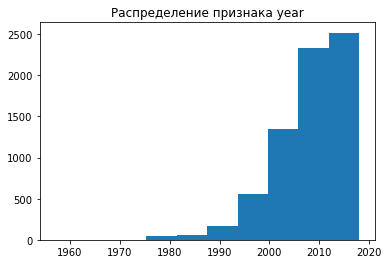

In [69]:
import matplotlib.pyplot as plt
 
plt.hist(data.year)
plt.title('Распределение признака year');

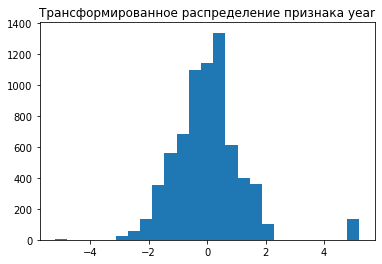

In [70]:
from sklearn.preprocessing import QuantileTransformer
# Данный трансформер принимает на вход 2D-массив, поэтому нам надо изменить формат данных (поскольку мы подаём на вход только один столбец)
data_for_transform = data['year'].values.reshape((len(data),1))
 
quantile = QuantileTransformer(output_distribution='normal')
data_transformed = quantile.fit_transform(data_for_transform)
 
plt.hist(data_transformed, bins=25)
plt.title('Трансформированное распределение признака year')
plt.show()

### Задание 6.1

Преобразуйте распределение признаков condition и cylinders в равномерное. Какое значение признака condition получится у нулевого объекта? Ответ округлите до второго знака после точки-разделителя.

In [71]:
data_for_transform = data[['condition', 'cylinders']].values.reshape(len(data),2)
data_for_transform

array([[4, 6],
       [2, 8],
       [2, 8],
       ...,
       [3, 8],
       [2, 8],
       [2, 8]], dtype=int64)

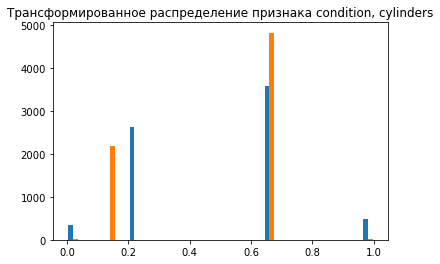

In [72]:
# Данный трансформер принимает на вход 2D-массив, поэтому нам надо изменить формат данных (поскольку мы подаём на вход только один столбец)
data_for_transform = data[['condition', 'cylinders']]
 
quantile = QuantileTransformer(output_distribution='uniform')
data_transformed = quantile.fit_transform(data_for_transform)
 
plt.hist(data_transformed, bins=25)
plt.title('Трансформированное распределение признака condition, cylinders')
plt.show()

In [73]:
data_transformed[0][0]

0.9639639639639639

### LOG TRANSFORM

**Логарифмическое преобразование** — один из самых популярных методов преобразования. В основном оно используется для превращения асимметричного распределения в нормальное/менее асимметричное. В этом преобразовании мы берём логарифм значений признака вместо самих значений.

Почему это работает? Потому что функция логарифма создана для работы с большими числами.

Посмотрим на распределение признака price. Оно асимметрично, причём значения варьируются от 0 до ~300000.

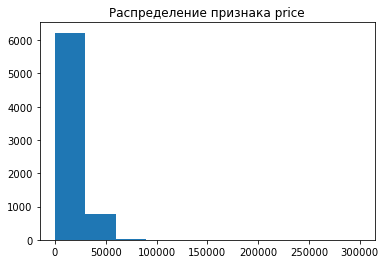

In [74]:
plt.hist(data.price)
plt.title('Распределение признака price');

Идеальный кандидат для логарифмического преобразования — применим его. На этот раз обойдёмся силами numpy.

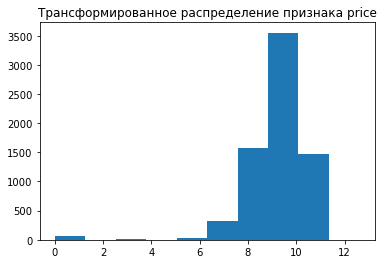

In [75]:
log_price = np.log(data['price'])
 
plt.hist(log_price)
plt.title('Трансформированное распределение признака price')
plt.show()

Давайте также сравним значения исходного и трансформированного признака.



In [76]:
price_data = pd.concat([data['price'], log_price.rename('transformed_price')], axis = 1)
 
price_data.describe()

,price,transformed_price
count,7017.000000,7017.000000
mean,15121.549523,9.204510
std,11765.423119,1.275868
min,1.000000,0.000000
25%,5995.000000,8.698681
50%,12750.000000,9.453287
75%,21995.000000,9.998570
max,299500.000000,12.609870


### Задание 6.3

Какое значение признака transformed_price имеет последний объект? Ответ округлите до одного знака после точки-разделителя.

In [77]:
round(price_data.transformed_price.iloc[-1],1)

9.8

## POWER TRANSFORMER SCALER

Как и другие скейлеры, с которыми вы уже познакомились, Power Transformer также изменяет распределение переменной, то есть делает его более гауссовым (нормальным).

Однако чтобы использовать все изученные раннее методы трансформации и скейлинга, необходимо сначала понять исходное распределение признака, а затем уже делать выбор. Power Transformer фактически автоматизирует принятие этого решения, вводя параметр, называемый lambda. Он принимает решение об обобщённом степенном преобразовании, находя наилучшее значение  и используя один из следующих параметрических методов:

* **Преобразование Бокса-Кокса**, которое работает для положительных значений признака.
* **Преобразование Йео-Джонсона**, которое учитывает при расчётах нулевые и отрицательные значения обрабатываемых переменных.

В нашем случае мы будем использовать преобразование Бокса-Кокса, так как все значения положительны.

In [78]:
from sklearn.preprocessing import PowerTransformer
box_cox = PowerTransformer(method = 'box-cox')
 
data_box_cox = box_cox.fit_transform(data[['price', 'year']].values)
data_box_cox = pd.DataFrame(data_box_cox, columns = ['transformed_price', 'transformed_year'])

c:\Users\Home\anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\Home\anaconda3\lib\site-packages\numpy\core\_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


Сравнение распределений до трансформации и после:


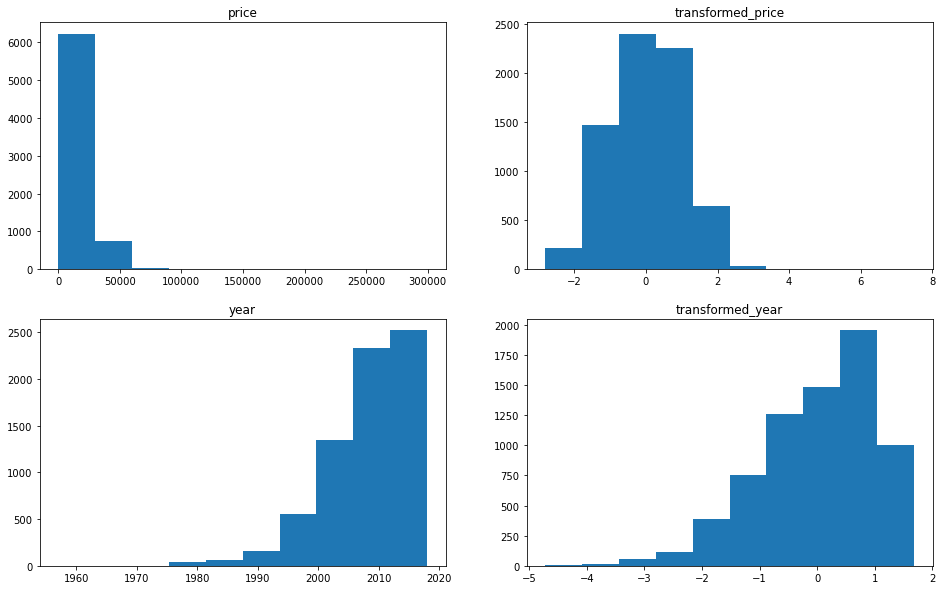

In [79]:
print('Сравнение распределений до трансформации и после:')

fig, ax = plt.subplots(2,2,figsize=(16, 10))
ax[0,0].hist(data['price'])
ax[0,0].set_title('price')
ax[0,1].hist(data_box_cox['transformed_price'])
ax[0,1].set_title('transformed_price')
ax[1,0].hist(data['year'])
ax[1,0].set_title('year')
ax[1,1].hist(data_box_cox['transformed_year'])
ax[1,1].set_title('transformed_year');



# 7. Даты и расстояния

In [80]:
data = pd.read_excel('data_ford_price.xlsx', engine='openpyxl') 

✍ После того как данные избавлены от пропусков, закодированы и масштабированы, приходит время агрегации полезной информации из них.

В рамках блока [EDA-3.4. «Создание признаков. Работа с форматом «дата-время»](https://lms.skillfactory.ru/courses/course-v1:SkillFactory+DST-3.0+28FEB2021/jump_to_id/299db8f2b6034c46bf9ca45a6511ecef) вы узнали о том, как с помощью двух колонок с датой и временем определять, например, продолжительность телефонного разговора.

[→ Скачайте ноутбук с кодом юнита](https://lms.skillfactory.ru/assets/courseware/v1/fe3e274a80bb0d4455935b542fd82463/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/%D0%94%D0%B0%D1%82%D1%8B_%D0%B8_%D1%80%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D1%8F.ipynb)

По аналогии с датой и временем можно использовать информацию в столбцах, например, широту и долготу.

Давайте найдём конкретный адрес нулевого объекта, используя широту и долготу. Для этого нам понадобится библиотека geopy.

In [81]:
!pip install geopy


In [82]:
from geopy.geocoders import Nominatim

Создаём объект Nominatim и инициализируем API Nominatim с помощью параметра geoapiExercises.

In [83]:
geolocator = Nominatim(user_agent="geoapiExercises")


Объединим широту и долготу для поиска адреса нулевого объекта:



In [84]:
Latitude = str(data['lat'][0])
Longitude =  str(data['long'][0])
location = geolocator.reverse(Latitude+","+Longitude)
print(location)

Fort Henry Drive, Kingsport, Sullivan County, Tennessee, 37663, United States


Теперь получим информацию из данного списка и преобразуем её в словарь с помощью функции raw():

In [85]:
address = location.raw['address']
address

{'road': 'Fort Henry Drive',
 'city': 'Kingsport',
 'county': 'Sullivan County',
 'state': 'Tennessee',
 'ISO3166-2-lvl4': 'US-TN',
 'postcode': '37663',
 'country': 'United States',
 'country_code': 'us'}

### Задание 7.2

Найдите почтовый код пятого объекта выборки.

In [86]:
Latitude = str(data['lat'][5])
Longitude =  str(data['long'][5])
location = geolocator.reverse(Latitude+","+Longitude)
print(location)
address = location.raw['address']
address['postcode']

E&J Motors, Southeast Washington Street, Montavilla, Portland, Multnomah County, Oregon, 98215, United States


'98215'

С помощью библиотек geopandas и shapely можно визуализировать географические данные. Это значит, что мы можем увидеть расположение наших объектов (автомобилей) на карте мира.

Установим данные библиотеки:

In [87]:
# !pip install geopandas
# !pip install shapely

In [88]:
# conda install geopandas
# conda install shapely

Отметим расположение объектов нашей выборки зелёным цветом.



In [89]:
# from shapely.geometry import Point
# import geopandas as gpd
# from geopandas import GeoDataFrame
# import matplotlib.pyplot as plt
 
# geometry = [Point(xy) for xy in zip(data['long'], data['lat'])]
# gdf = GeoDataFrame(data, geometry=geometry)  
 
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# gdf.plot(ax=world.plot(figsize=(15, 15)), marker='o', color='green', markersize=15)
 
# plt.title('Расположение автомобилей на карте мира')
# plt.show()

![](https://lms.skillfactory.ru/assets/courseware/v1/c4667fe1d6df5723c091f8f8b693b46b/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml6-7_3.png)

С помощью Plotly мы можем построить интерактивную карту и отследить изменение цены автомобиля в зависимости от его локации:

In [90]:
import plotly.express as px
import pandas as pd
 
fig = px.scatter_geo(data,lat='lat',lon='long', hover_name="price")
fig.update_layout(title = 'Интерактивная карта цены автомобиля в зависимости от локации', title_x=1)
fig.show()

# 8. Отбор признаков: мотивация

> [**Отбор признаков** ](https://lms.skillfactory.ru/courses/course-v1:SkillFactory+DST-3.0+28FEB2021/jump_to_id/64e2d2b4f85e4a59a37c6622835479e7) — это процесс выбора важных признаков, оказывающих наибольшее влияние на предсказание.

[→ Скачайте ноутбук с кодом юнита](https://lms.skillfactory.ru/assets/courseware/v1/ae0ff78bfe05613e358932c7f3ea0608/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/%D0%9E%D1%82%D0%B1%D0%BE%D1%80_%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D0%B2.ipynb) (также он пригодится вам в следующем юните)

Давайте оценим влияние мультиколлинеарности на линейную регрессию:

In [91]:
data = data[['price','year', 'cylinders', 'odometer', 'lat', 'long', 'weather']]
data.dropna(inplace = True)
y = data['price']
x = data.drop(columns='price')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

# MAE: 4682.957

MAE: 4682.957


Мы выяснили, что у нас присутствует сильная зависимость между lat и weather. Удалим lat, так как этот признак, в отличие от weather, необходимо округлять.

In [92]:
x.drop('lat', axis = 1, inplace = True)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

# MAE: 4672.930

MAE: 4672.930


✍ Итак, мы вспомнили о понятии мультиколлинеарности и о его влиянии на отбор признаков. В следующем юните мы разберём автоматические методы отбора признаков, влияющих на качество моделирования.

# 9. Отбор признаков: классификация методов

> Методы отбора признаков предназначены для уменьшения количества входных переменных до тех значений, которые наиболее полезны для предсказательной способности модели.

![](https://lms.skillfactory.ru/assets/courseware/v1/a9a03b27389e7e8d9b8180f545260056/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml6-9_5.png)

## RFE

> **Метод рекурсивного исключения признаков (RFE)** предполагает выбор признаков путём рекурсивного рассмотрения всё меньших и меньших наборов фичей.

Сначала RFE обучается на изначальной выборке и происходит оценка важности каждого признака. Затем наименее важные фичи удаляются. Эта процедура рекурсивно повторяется на сокращённом наборе до тех пор, пока в конечном итоге не будет достигнуто желаемое количество признаков в выборке.

Выделим три наиболее значимых признака:

In [93]:
from sklearn.feature_selection import RFE
 
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
 
selector.get_feature_names_out()

array(['year', 'cylinders', 'weather'], dtype=object)

Также узнаем, как RFE проранжировал все доступные признаки:

In [94]:
print(X_train.columns)
print(selector.ranking_)

Index(['year', 'cylinders', 'odometer', 'long', 'weather'], dtype='object')
[1 1 3 2 1]


## МЕТОДЫ ВЫБОРА ПРИЗНАКОВ НА ОСНОВЕ ФИЛЬТРОВ

В качестве фильтров для выбора признаков используются уже знакомые нам статистики, такие как коэффициент корреляции Пирсона, ANOVA и т. д. При этом выбор статистических показателей сильно зависит от типов переменных в данных.

Чем больше известно о типе данных, тем проще выбрать подходящую статистическую меру для метода отбора признаков на основе фильтра. Ниже приведена схема — помощник в выборе метода селекции признаков.

![](https://lms.skillfactory.ru/assets/courseware/v1/8f55a77ec813c98e6e48f2efff923f23/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml6-9_3.png)

Библиотека sklearn обеспечивает реализацию большинства полезных статистических показателей, например:

* коэффициента корреляции Пирсона: [f_regression()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html);
* дисперсионного анализа ANOVA: [f_classif()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html);
* хи-квадрата: [chi2()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html);
* взаимной информации: [mutual_info_classif()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html) и [mutual_info_regression()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html).

Кроме того, библиотека SciPy обеспечивает реализацию многих других статистических данных, таких как тау Кендалла ([kendalltau](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html)) и ранговая корреляция Спирмена ([spearmanr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html)).

sklearn также предоставляет множество различных методов фильтрации после расчёта статистики для каждой входной переменной с целевой.

Два наиболее популярных метода:

* выбор k лучших переменных: [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html);
* выбор переменных верхнего процентиля: [SelectPercentile](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html).

In [95]:
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=3)
selector.fit(X_train, y_train)
 
selector.get_feature_names_out()

array(['year', 'cylinders', 'odometer'], dtype=object)

На этот раз odometer оказался в топе.